In [1]:
###############################################################################
# Information
###############################################################################

# Created by Linwood Creekmore III
# Started Mar 2016
# For Johns Hopkins University Data Scinece Certification track; Reproducible Research
# Github = https://github.com/linwoodc3

options(jupyter.plot_mimetypes = 'image/png')

### The Purpose of Reproducible Research

Repoducible analysis is all about equipping independent researchers and readers with the tools, data, and analytic code needed to reproduce the results of a study or scientific endeavor. This study uses RMarkdown; read [knitr in a knutshell](http://kbroman.org/knitr_knutshell/) for more information and tricks. In this context, the task explores personal activity monitoring data.  The tools used for plotting and data transformation are imported below.

## Alternative Literate Statistical Programming
I also completed this assignment in a Jupyter Notebook Kernel for R langauge. The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text, which matches exactly what literate statistical programming aims to be (from our lectures). In these notebook, you can type and work with code interactively, and also download the finished product as Markdown, LaTex (PDF), ipython notebook, reST,R, or HTML.  [Learn more about using Jupyter Notebook with R here](http://irkernel.github.io/running/).

In [ ]:
###############################################################################
# Check for required packages and load 
###############################################################################
warnings = FALSE
list.of.packages <- c("dplyr", "tidyr", "RColorBrewer","ggthemes","ggplot2")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(RColorBrewer)
library(dplyr)
library(tidyr)
library(ggthemes)
library(ggplot2)

[`RColorBrewer`](http://www.r-bloggers.com/r-using-rcolorbrewer-to-colour-your-figures-in-r/), [`ggplot2`](http://www.r-bloggers.com/ggplot2-2-1-0/), and [`ggthemes`](https://cran.r-project.org/web/packages/ggthemes/vignettes/ggthemes.html) are all used for visualization, while [`dplyr`](https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html) and [`tidyr`](http://blog.rstudio.org/2014/07/22/introducing-tidyr/) support data cleaning and transformation.  <br><br>

In [3]:

###############################################################################
# Looking for locations of files
###############################################################################

if (!file.exists('data')) {
        dir.create('data')}
if (!file.exists('./data/files')) {
        dir.create('./data/files')}

## Loading and preprocessing the data
This code will check to see if the file exists in the local working directory or workspace, and if not, then [downloads the csv from the source](https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip) and loads it into a dataframe
called `activity`.

In [4]:

###############################################################################
# Download the zip file
###############################################################################

# downloading the raw zip file and saving as a temporary file or, just passing step if file exists
temp <- tempfile()
if (!file.exists('./data/files/activity.csv')) {
        print(paste0("You did not have the file; downloading.... "))        
        download.file("https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip",temp)
        unzip(temp,exdir = './data/files')
        print(paste0("You did not have the file; download complete. Proceeding.... "))
} else {
        print(paste0("You have the target zip file. Proceeding.... "))        
}

[1] "You have the target zip file. Proceeding.... "


In [5]:
dir("data/files")

[1] "activity.csv"

In [6]:
activity <- read.csv('./data/files/activity.csv', sep = ",",na.strings = "NA", )

In [7]:
str(activity)

'data.frame':	17568 obs. of  3 variables:
 $ steps   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ date    : Factor w/ 61 levels "2012-10-01","2012-10-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ interval: int  0 5 10 15 20 25 30 35 40 45 ...


In [8]:
summary(activity$steps)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    0.00   37.38   12.00  806.00    2304 

## What is mean total number of steps taken per day?
We will use `dplyr` to calculate the mean total number of steps taken per day.  `dplyr` is a great tool to group data and calculate values over these grouped sets.  Below, we use the [chaining](http://www.inside-r.org/packages/cran/dplyr/docs/chain) method of `dplyr` functions to manipulate the `activity` data.

First, calculate the total number of steps taken per day.

In [9]:
per_day <- activity%>%
    na.omit()%>% # removing the na data
    group_by(date)%>%
    summarise(total.steps=sum(steps),
              average.steps = mean(steps))

head(per_day)

,date,total.steps,average.steps
1,2012-10-02,126,0.4375
2,2012-10-03,11352,39.41667
3,2012-10-04,12116,42.06944
4,2012-10-05,13294,46.15972
5,2012-10-06,15420,53.54167
6,2012-10-07,11015,38.24653


<br>Next we create a histogram using the [`geom_histogram`](http://docs.ggplot2.org/current/geom_histogram.html) function from `ggplot2`.  Note, we are also using the Economist theme from `ggthemes` to create a polished look.  <br>

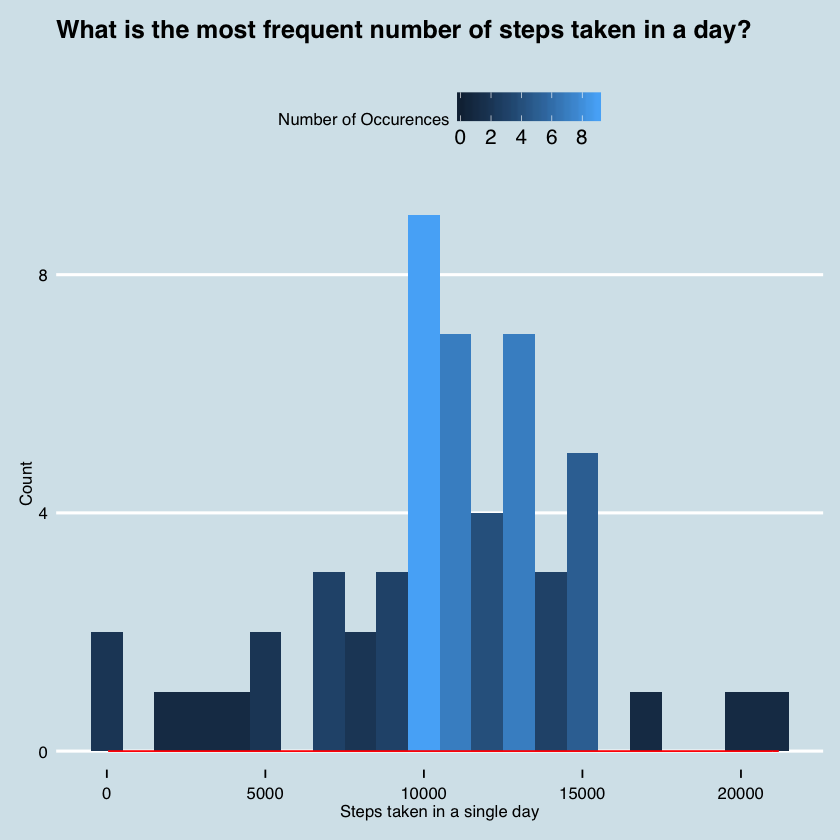

In [10]:
g <- ggplot(per_day,aes(total.steps))
g + geom_histogram(binwidth = 1000, aes(fill=..count..))+
        theme_economist()+
        stat_function(fun = dnorm, colour = "red")+
        scale_y_continuous(breaks=c(0,4,8,12))+
        scale_fill_continuous(guide_legend(title.position="right",title='Number of Occurences'),
                           breaks = seq(0,10,by=2),
                           labels = seq(0,10,by=2))+
        scale_colour_economist()+
        labs(x="Steps taken in a single day",y="Count",
             title="What is the most frequent number of steps taken in a day?")

With an understanding of frequently occuring values, let's look at the overall mean and median of the *total number* of steps taken per day (e.g. over the entire data set).

In [52]:
# The mean
print(paste0("The mean is ",mean(per_day$total.steps)))

# The median
print(paste0("The median is ",median(per_day$total.steps)))

[1] "The mean is 10766.1886792453"
[1] "The median is 10765"


## What is the average daily activity pattern?
The next exercise is to create a time series plot that looks at the average number of steps taken 5-minute intervals across all days. Again, we use `dplyr` to index and select the correct data.  

In [11]:
interval_activity <- activity%>%
    na.omit()%>% # removing the na data
    group_by(interval)%>%
    summarise(average.steps = mean(steps))

With the data selected, the next ste is to make a time series plot and make the busiest interval stand out.  

In [12]:
head(interval_activity)

,interval,average.steps
1,0,1.716981
2,5,0.3396226
3,10,0.1320755
4,15,0.1509434
5,20,0.0754717
6,25,2.09434


In [13]:
typeof(interval_activity$average.steps[2])

[1] "double"

In [53]:
print(paste0("The 5-minute interval with the maximum average steps is ",
interval_activity$interval[interval_activity$average.steps == max(interval_activity$average.steps)]))

[1] "The 5-minute interval with the maximum average steps is 835"


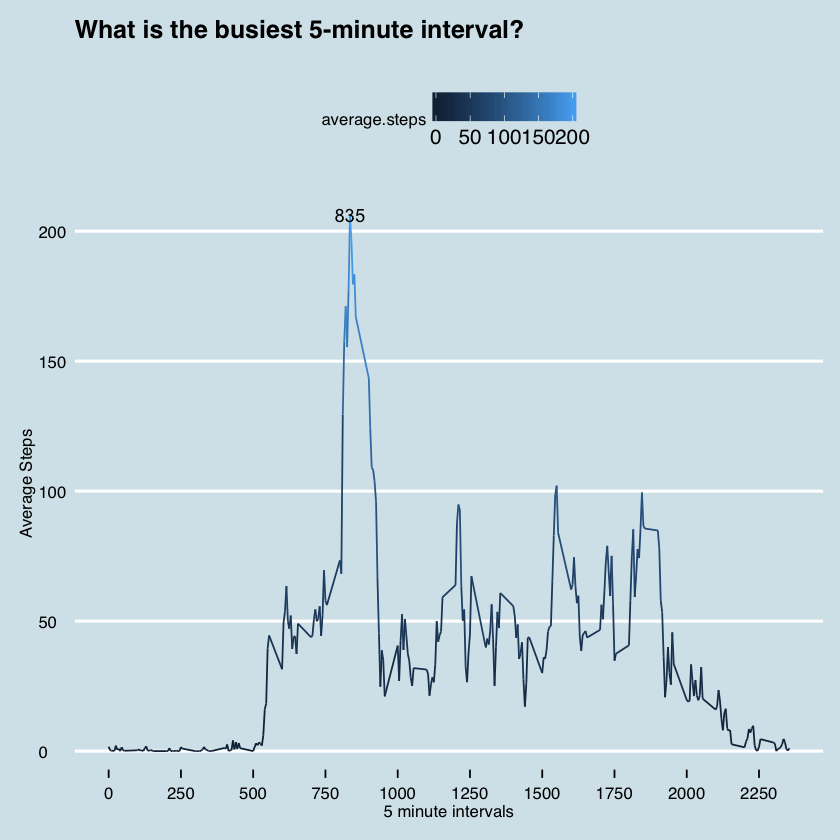

In [54]:
l <- ggplot(interval_activity,aes(x=interval,y=average.steps))
l + geom_line(aes(colour=average.steps))+
scale_x_continuous(breaks=seq(0,2500,by=250))+
theme_economist()+
geom_text(aes(label=ifelse(interval_activity$average.steps == max(interval_activity$average.steps),
                           as.numeric(interval_activity$interval),'')))+
        labs(x="5 minute intervals",y="Average Steps",
             title="What is the busiest 5-minute interval?")

## Imputing missing values
The next step in the analysis is to calculate and report the total number of missing values in the data set.  

In [16]:
# sum of NA

sum(is.na(activity))

[1] 2304

Just to be sure, let's see if the `NA` is confined to one column or spread across.  We need to get a final number of `2304` if the missing data is spread over the columns.

In [56]:
# Testing NAs across columns

sapply(activity,function(x) sum(is.na(x)))

steps     date interval 
    2304        0        0

Good!  The `NA`s are confined to the `steps` column.  What percentage is missing?

In [57]:
# Percentage of NA columns in steps.

sum(is.na(activity$steps))/length(activity$steps)*100

[1] 13.11475

### Strategy to fill missing values
13%.  Not bad!.  Let's replace the missing numbers with the mean and create a new `filled_activity` dataset.  To be clear, we use a simple method to just insert the average in place of the NA values.  We use dplyr chaining to complete this.

In [59]:
new_activity <- activity%>%
    group_by(interval)%>%
    mutate(steps = ifelse(is.na(steps),mean(steps,na.rm=TRUE),steps))
    


filled_activity <- new_activity%>%
    group_by(date)%>%
    summarise(total.steps=sum(steps),
              average.steps = mean(steps))


    
    
head(new_activity); head(filled_activity)

,steps,date,interval
1,1.716981,2012-10-01,0
2,0.3396226,2012-10-01,5
3,0.1320755,2012-10-01,10
4,0.1509434,2012-10-01,15
5,0.0754717,2012-10-01,20
6,2.09434,2012-10-01,25


,date,total.steps,average.steps
1,2012-10-01,10766.19,37.3826
2,2012-10-02,126,0.4375
3,2012-10-03,11352,39.41667
4,2012-10-04,12116,42.06944
5,2012-10-05,13294,46.15972
6,2012-10-06,15420,53.54167


Let's make a quick histogram to see the data.

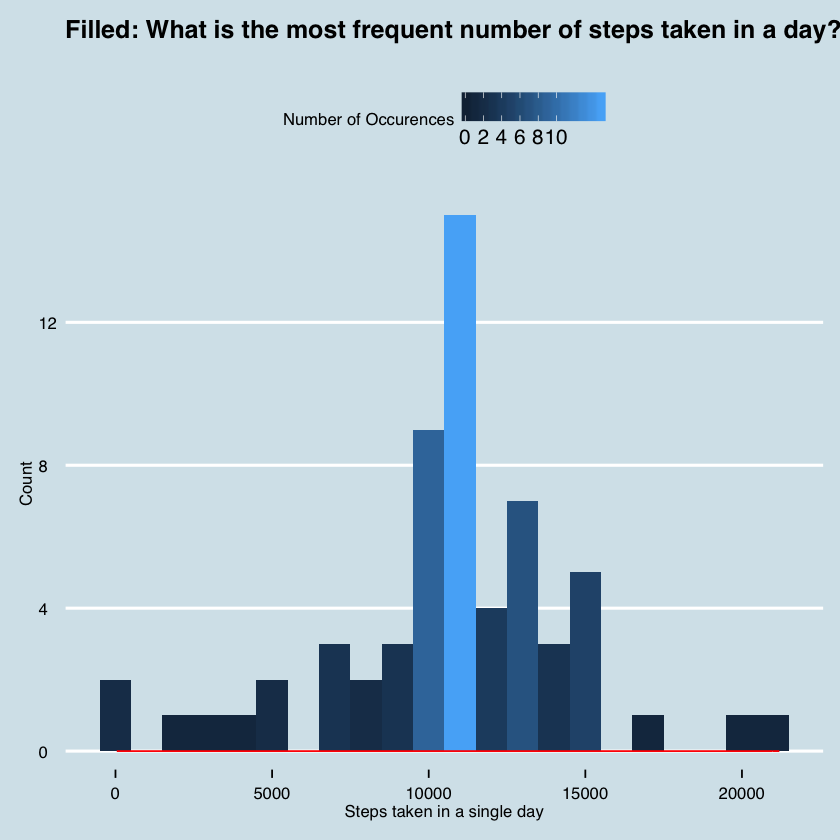

In [60]:
g <- ggplot(filled_activity,aes(total.steps))
g + geom_histogram(binwidth = 1000, aes(fill=..count..))+
        theme_economist()+
        stat_function(fun = dnorm, colour = "red")+
        scale_y_continuous(breaks=c(0,4,8,12))+
        scale_fill_continuous(guide_legend(title.position="right",title='Number of Occurences'),
                           breaks = seq(0,10,by=2),
                           labels = seq(0,10,by=2))+
        scale_colour_economist()+
        labs(x="Steps taken in a single day",y="Count",
             title="Filled: What is the most frequent number of steps taken in a day?")

Here are the mean and median.

In [63]:
# The mean
print(paste0("The new mean is ",mean(filled_activity$total.steps)))

# The median
print(paste0("The new sum is ",median(filled_activity$total.steps)))

[1] "The new mean is 10766.1886792453"
[1] "The new sum is 10766.1886792453"


The mean and median changed slighly but not much in terms of the total magnitude.  The mean is pretty much the same.  The impact is that the histogram values are higher for the filled data set.  

## Are there differences in activity patterns between weekdays and weekends?
Understanding the difference in weekday and weekend patterns means we must convert our dates to representations of days of the week, and then classify them into weekend and weekday factors. A great walkthrough was on stackoverflow, [converting weekdays to week and weekend factors.](from stackoverflow http://stackoverflow.com/questions/28893193/creating-factor-variables-weekend-and-weekday-from-date) 

In [66]:
new_activity$date <- as.Date(new_activity$date)
weekdays1 <- c('Monday',"Tuesday","Wednesday","Thursday","Friday")
new_activity$wDay <- c('weekend','weekday')[(weekdays(new_activity$date) %in% weekdays1)+ 1L]
head(new_activity)

,steps,date,interval,wDay
1,1.716981,2012-10-01,0,weekday
2,0.3396226,2012-10-01,5,weekday
3,0.1320755,2012-10-01,10,weekday
4,0.1509434,2012-10-01,15,weekday
5,0.0754717,2012-10-01,20,weekday
6,2.09434,2012-10-01,25,weekday


Let's check the factors and build a data set with averages.

In [68]:
weekdays(new_activity$date[6])

# Building a new data set
filled_interval_activity <- new_activity%>%
    group_by(interval,wDay)%>%
    summarise(average.steps = mean(steps))


head(filled_interval_activity)

[1] "Monday"

,interval,wDay,average.steps
1,0,weekday,2.251153
2,0,weekend,0.2146226
3,5,weekday,0.445283
4,5,weekend,0.04245283
5,10,weekday,0.1731656
6,10,weekend,0.01650943


Now to the final step, the plot comparing the average number of steps averaged across all weekends and weekdays in a time series plot of 5-minute intervales. We are just adding a [`facet_grid`](http://docs.ggplot2.org/current/facet_grid.html) based on the newly created `wDay` column.  

In [69]:
m <- ggplot(filled_interval_activity,aes(x=interval,y=average.steps, fill=wDay))

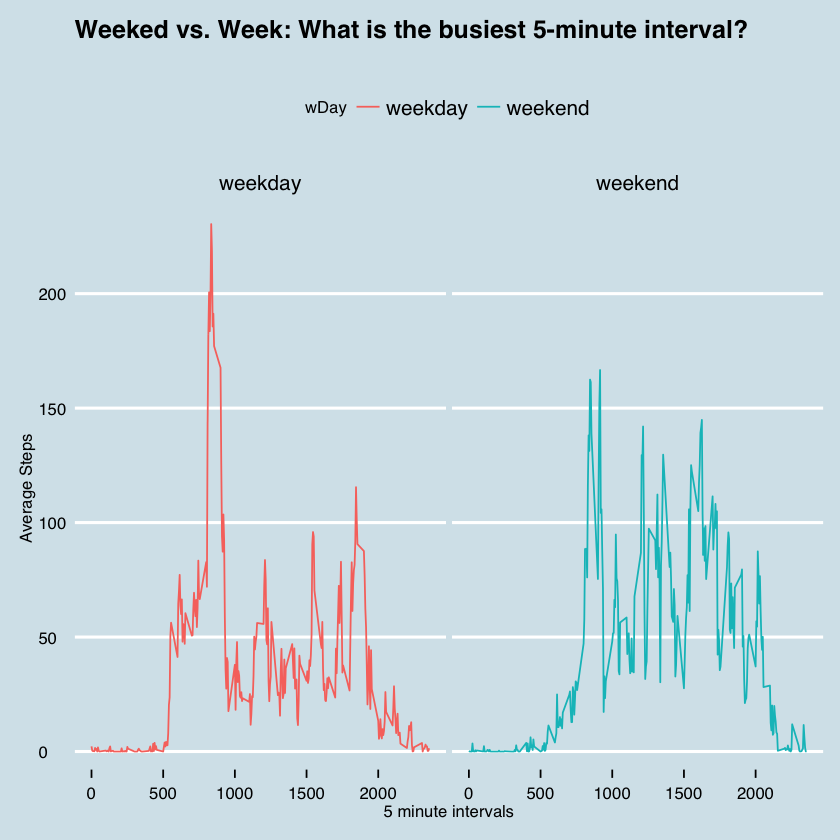

In [70]:
m + geom_line(aes(colour=wDay)) + facet_grid(.~wDay)+ scale_fill_brewer(palette = "Paired")+theme_economist()+labs(x="5 minute intervals",y="Average Steps",
             title="Weeked vs. Week: What is the busiest 5-minute interval?")